<a href="https://colab.research.google.com/github/mathiasadikpon/AI/blob/main/Week2_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a linear model (height = m * year + b) to describe the trend of height increase for United Kingdom between 1900 and 1980. Compute the mean square error of your model, and display the model line together with the data points. 

In [ ]:
!ls

average-height-of-men-for-selected-countries.csv  sample_data


In [ ]:
import numpy as np  # scientific computation
import pandas as pd  # data handling
import matplotlib.pyplot as plt  # plotting
# The following "magic command" allows figures to be displayed automatically in notebook
%matplotlib inline 


In [ ]:
raw_data = pd.read_csv("average-height-of-men-for-selected-countries.csv", sep=',')

In [ ]:
#Extract US Data
raw_data.head()

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
0,Afghanistan,AFG,1870,168.4
1,Afghanistan,AFG,1880,165.7
2,Afghanistan,AFG,1930,166.8
3,Albania,ALB,1880,170.1
4,Albania,ALB,1890,169.8


In [ ]:
filter1 = (raw_data['Entity'] == "United Kingdom")
data = raw_data[filter1]
data

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1176,United Kingdom,GBR,1810,169.7
1177,United Kingdom,GBR,1820,169.1
1178,United Kingdom,GBR,1830,166.7
1179,United Kingdom,GBR,1840,166.5
1180,United Kingdom,GBR,1850,165.6
1181,United Kingdom,GBR,1860,166.6
1182,United Kingdom,GBR,1870,167.2
1183,United Kingdom,GBR,1880,168.0
1184,United Kingdom,GBR,1890,167.4
1185,United Kingdom,GBR,1900,169.4


In [ ]:
# Extract United Kingdom data since 1900.

filter2 = (data["Year"] >= 1900)
data = data[filter2]
data

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1185,United Kingdom,GBR,1900,169.4
1186,United Kingdom,GBR,1910,170.9
1187,United Kingdom,GBR,1920,171.0
1188,United Kingdom,GBR,1930,173.9
1189,United Kingdom,GBR,1940,174.9
1190,United Kingdom,GBR,1950,176.0
1191,United Kingdom,GBR,1960,176.9
1192,United Kingdom,GBR,1970,177.1
1193,United Kingdom,GBR,1980,176.8


In [ ]:
# Reset index
data = data.set_index(["Year"])
data.head()

,Entity,Code,Human Height (University of Tuebingen (2015))
Year,,,
1900,United Kingdom,GBR,169.4
1910,United Kingdom,GBR,170.9
1920,United Kingdom,GBR,171.0
1930,United Kingdom,GBR,173.9
1940,United Kingdom,GBR,174.9


In [ ]:
data.drop(["Entity", 'Code'], axis=1, inplace=True) 
# axis specifies row drop or column drop
# axis=0 means row drop
# axis=1 means column drop
# inplace determines whether the modification is done to the original data frame
# inplace=True means modifying the original data frame
# inplace=False means create a new data frame for the modification
data.head()

,Human Height (University of Tuebingen (2015))
Year,
1900,169.4
1910,170.9
1920,171.0
1930,173.9
1940,174.9


In [ ]:
data = data.rename(columns={'Human Height (University of Tuebingen (2015))': "Height(cm)"})
data

,Height(cm)
Year,
1900,169.4
1910,170.9
1920,171.0
1930,173.9
1940,174.9
1950,176.0
1960,176.9
1970,177.1
1980,176.8


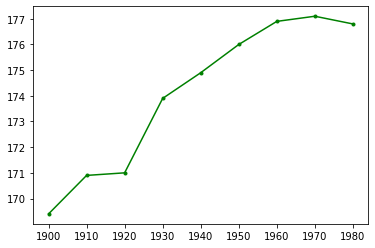

In [ ]:
heights = data['Height(cm)']
years = data.index
plt.plot(years, heights, 'g.-')

How would you describe the trend?

Is there a trend?
Answer: There is an linear upward trend.

Is the trend upward or downward?
Answer: upward

It the trend consistent?
Answer: pretty consistent

Conclusion: During the 20th century, United Kingdom men's height increases at a steady rate.

In [ ]:
# Linear model ( height=m⋅year+b )
#Compute Slope m
m = (176.8 - 169.4)/(1980 - 1900)
print("Slope m = ", m)

Slope m =  0.09250000000000007


In [ ]:
# Let the slope be the average rate of increase.
# If the model is height = m * year + b, 
# find the value of b so that point (1900, 169.4) lies on the line.
m =  0.09250000000000007
height = 169.4
year = 1900
b = height - m * year
print("Y-Intercept:", b)

Y-Intercept: -6.350000000000136


In [ ]:
print("Now our linear model is: height = {} * year + {}".format(m, b))

Now our linear model is: height = 0.09250000000000007 * year + -6.350000000000136


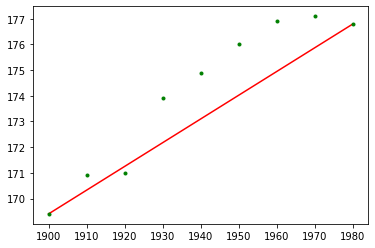

In [ ]:
# Plot the model line.
years = np.array([1900, 1940, 1980])
heights = 0.09250000000000007 * years + -6.350000000000136
plt.plot(years, heights,'r-')
# show the data points on this plot
plt.plot(data.index, data['Height(cm)'], 'g.')

Can you find another line that fits the model better?


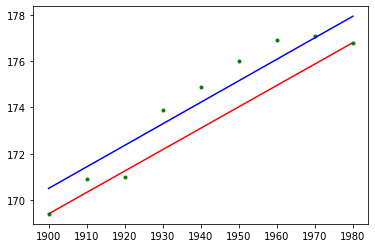

In [ ]:
m2 = 0.093
b2 = -6.2

plt.plot(years, heights, 'r-')
plt.plot(data.index, data['Height(cm)'], 'g.')

# plot the second line on this graph
heights2 = m2 * years + b2 
plt.plot(years, heights2, 'b-')

In [ ]:

# Calculate errors for each year

# all the years are contained in data.index 
m =  0.09250000000000007
b = -6.350000000000136
errors = []

for year in data.index:
    # Calculate the squared error for that year
    x = year
    y = data.loc[x, 'Height(cm)']
    prediction = m * x + b
    error = (prediction - y) ** 2

    # append the error to the errors list
    errors.append(error)

# Now you should have a list of errors.
print(errors)

[0.0, 0.3306250000000196, 0.0625, 2.9756250000000786, 3.240000000000041, 3.9006249999999776, 3.8025000000000664, 1.500624999999986, 0.0]


In [ ]:
# Calculate the mean squared error, use np.mean() function
print("mean squared error (MSE) : ", np.mean(errors))

mean squared error (MSE) :  1.7569444444444633


# New Section